The sensitivity of a patient w.r.t Profol is modeled by $k_2 \in [0, 10]$ (realistic values: $k_2 \in [2, 10]$).

Meaning: "Volumenstatus und Kardiale Kompensationsfähigkeit" (earlier notation: `fp`).

Higher value means more sensitivity.

Formula for continuous application (MAP $p$, dose $d$ [mg/(kgKG·h)]): $p = p_0 - k_2 \cdot d$.

For bolus-application (dose $d_b$ [mg/kgKG]) we need the "effect" $E$: $E = 1- \mathrm{exp}(k_\mathrm{exp}*d_b)$

The final patient model should have a one-to-one mapping between $k_2$ and $k_\mathrm{exp}$. This notebook establishes this connection via constrained polynomial regression.

"Constrained" because we already know that $k_2 = 0 \Rightarrow k_\mathrm{exp} = 0$ (reason: no sensitivity at all in both scenarios),
$k_2 = 10 \Rightarrow k_\mathrm{exp} = 2$ (empirical observation).

All other datapoints are used as regression points. The degree $n=2$ is fixed to limit complexitiy.

In [1]:
import importlib as il

import numpy as np
import matplotlib.pyplot as plt
import boasim as bs

Text(0.7, 0.6, 'dose=3 mg/kg/KG')

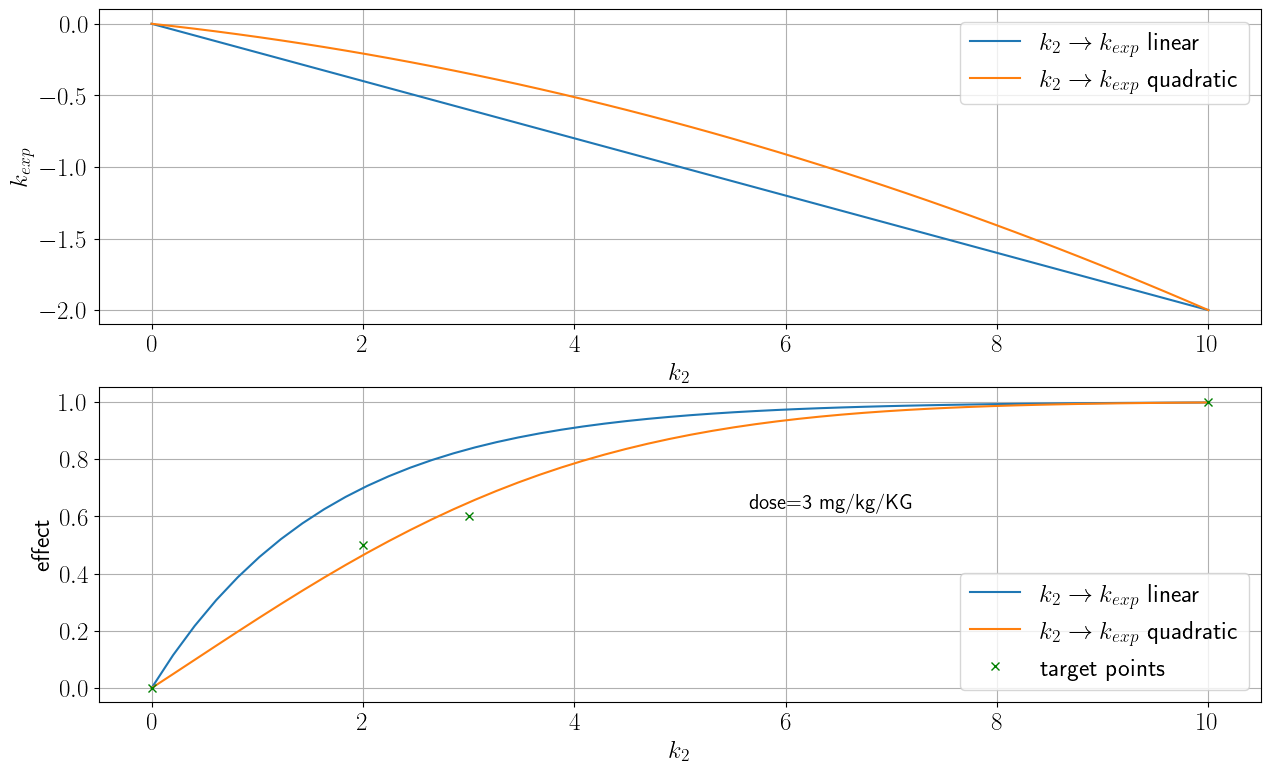

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['legend.fontsize']= 'medium'
plt.rcParams['font.size']= 18

%matplotlib inline

# k_exp aus k2 berechnen

# k_exp = np.linspace(-2, 0)

k2 = np.linspace(0, 10)

# k2 = 0 -> k_exp = 0
# k2 = 10 -> k_exp = -2
# k2 = 3, dose = 3, effect = 0.6
# k2 = 2, dose 3, effect = 0.5

k_exp_abs_max = 2
k2_max = 10

k_exp_poly_func = np.polynomial.Polynomial(bs.polyfit_with_fixed_points(n=2, x=[5] , y=[-0.7], yf=[0, -2], xf=[0, 10]))
# minimum values of both are 0


# linear mapping:
k_exp = -k_exp_abs_max*k2/k2_max


dose = 3
effect = 1 - np.exp(k_exp*dose)
effect_poly = 1 - np.exp(k_exp_poly_func(k2)*dose)

plt.figure(figsize=(15, 9))
plt.subplot(211)
plt.plot(k2, k_exp, label=r"$k_2 \rightarrow k_{exp}$ linear")
plt.plot(k2, k_exp_poly_func(k2), label=r"$k_2 \rightarrow k_{exp}$ quadratic")
plt.legend()
plt.grid()
plt.xlabel("$k_2$")
plt.ylabel("$k_{exp}$")

plt.subplot(212)

plt.plot(k2, effect, label=r"$k_2 \rightarrow k_{exp}$ linear")
plt.plot(k2, effect_poly, label=r"$k_2 \rightarrow k_{exp}$ quadratic")

plt.plot([0, 10, 2, 3], [0, 1, 0.5, 0.6], "gx", label="target points")
plt.xlabel("$k_2$")
plt.ylabel("effect")
plt.legend()
plt.grid()
ax = plt.gca()
plt.text(0.7, 0.6, f"dose={dose} mg/kg/KG",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, fontsize=15)
# plt.savefig("k2_k_exp_curves.png")
